# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.metrics import mutual_info_score
from matplotlib.pyplot import scatter
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

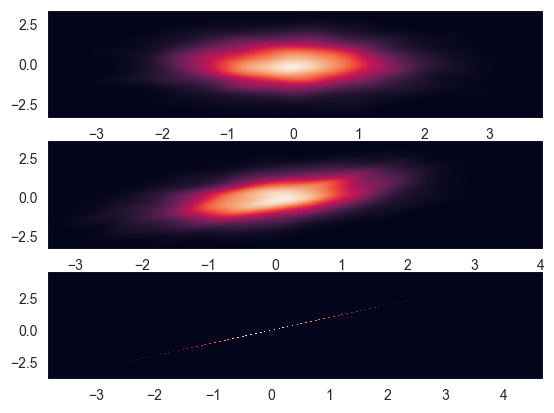

In [7]:
fig, axs = plt.subplots(3)

n = 5000
np.random.seed(0)

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [9]:
bins = np.array([0.1 * i for i in range(1, 10)])

n = 5000

for p in [0, 0.5, 1]:
    data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
    print(f"Pearson correlation for rho={p}: {pearsonr(data_2d[:, 0], data_2d[:, 1])}")
    scaler = MinMaxScaler()
    scaler.fit(data_2d)
    data_2d = scaler.transform(data_2d)
    data_2d = np.digitize(data_2d, bins)
    print(f"Mutual information for rho={p}: {mutual_info_score(data_2d[:, 0], data_2d[:, 1])}")

Pearson correlation for rho=0: PearsonRResult(statistic=0.01993994796895948, pvalue=0.1586120799356204)
Mutual information for rho=0: 0.0065735656953397475
Pearson correlation for rho=0.5: PearsonRResult(statistic=0.49350199273604506, pvalue=2.748191518241401e-305)
Mutual information for rho=0.5: 0.12994589157315706
Pearson correlation for rho=1: PearsonRResult(statistic=1.0, pvalue=0.0)
Mutual information for rho=1: 1.6280801009658068


#### bp 3)

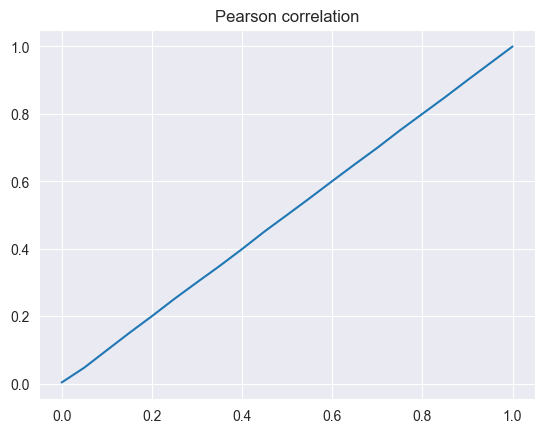

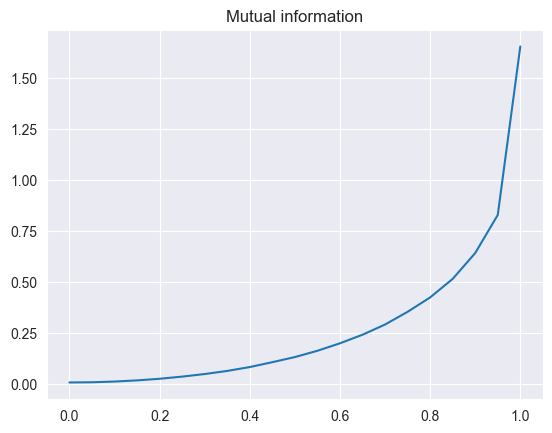

In [10]:
n, N = 5000, 100
p = [0.05 * i for i in range(21)]

avg_pearson_corrs = []
avg_mutual_informations = []
for p_i in p:
    pearson_corrs = []
    mutual_informations = []
    for _ in range(N):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p_i], [p_i, 1]]), n)
        pearson_corrs.append(pearsonr(data_2d[:, 0], data_2d[:, 1]).statistic)
        bins = np.linspace(np.min(data_2d), np.max(data_2d), 10)
        data_2d = np.digitize(data_2d, bins)
        mutual_informations.append(mutual_info_score(data_2d[:, 0], data_2d[:, 1]))
    avg_pearson_corrs.append(np.average(pearson_corrs))
    avg_mutual_informations.append(np.average(mutual_informations))
    
plt.plot(p, avg_pearson_corrs)
plt.title("Pearson correlation")
plt.show()
plt.plot(p, avg_mutual_informations)
plt.title("Mutual information")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

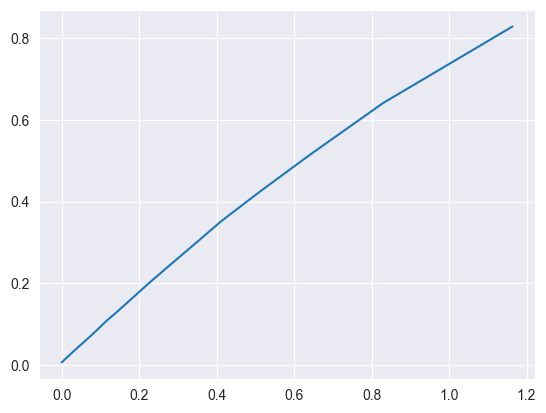

In [11]:
plt.plot(np.log(1 - np.array(p[:-1]) ** 2) / -2, avg_mutual_informations[:-1])
plt.show()

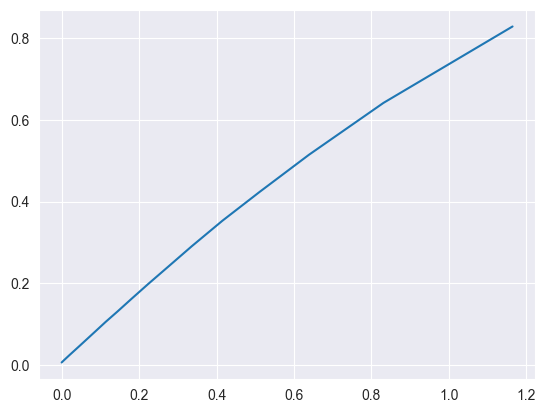

In [12]:
plt.plot(np.log(1 - np.array(avg_pearson_corrs[:-1]) ** 2) / -2, avg_mutual_informations[:-1])
plt.show()

### b)

#### bp 1)

In [13]:
# again: this is too time consuming so here is an answer

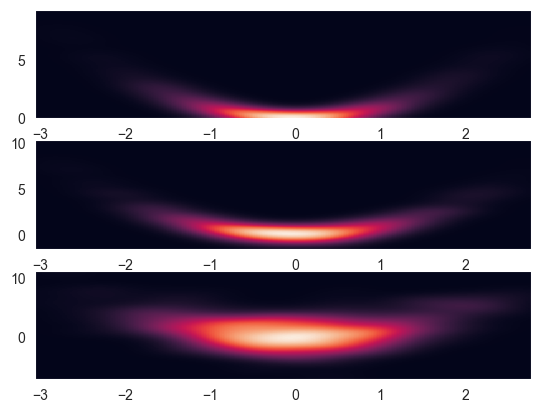

In [14]:
fig, axs = plt.subplots(3)

np.random.seed(0)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [15]:
n = 1000

for p in [0, 0.5, 2]:
    x = np.random.normal(0, 1, n)
    data_2d = np.array([x, x**2 + np.random.normal(0, p, n)]).T
    print(f"Pearson correlation for ro={p}: {pearsonr(data_2d[:, 0], data_2d[:, 1])}")
    bins = np.linspace(np.min(data_2d), np.max(data_2d), 10)
    data_2d = np.digitize(data_2d, bins)
    print(f"Mutual information for ro={p}: {mutual_info_score(data_2d[:, 0], data_2d[:, 1])}")

Pearson correlation for ro=0: PearsonRResult(statistic=0.028556588499037215, pvalue=0.3670073931252847)
Mutual information for ro=0: 0.5242228809857358
Pearson correlation for ro=0.5: PearsonRResult(statistic=0.025044994689137862, pvalue=0.4288705828812867)
Mutual information for ro=0.5: 0.37579949271694674
Pearson correlation for ro=2: PearsonRResult(statistic=-0.022415946455297805, pvalue=0.47890995145519666)
Mutual information for ro=2: 0.09408461886597352


#### bp 3)

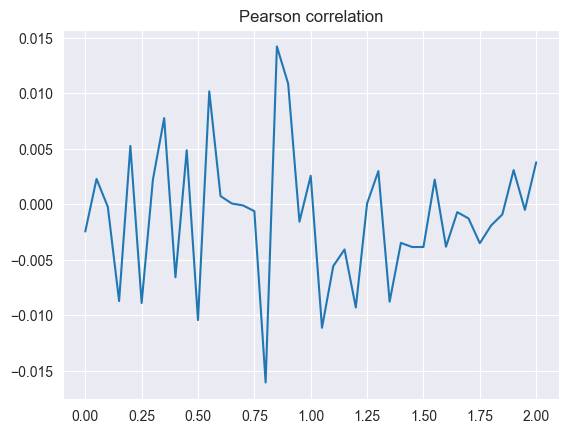

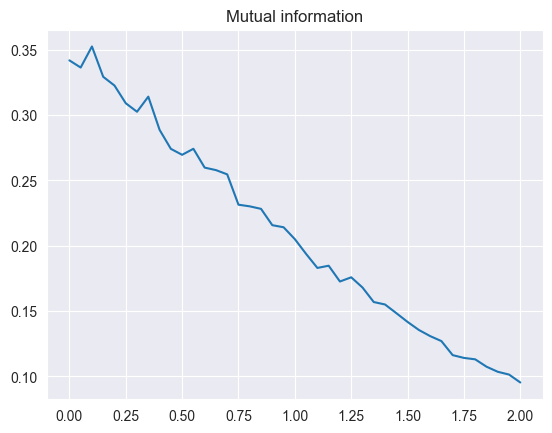

In [16]:
n, N = 1000, 100
bins = np.array([0.1 * i for i in range(1, 10)])
p = [0.05 * i for i in range(41)]

avg_pearson_corrs = []
avg_mutual_informations = []
for p_i in p:
    pearson_corrs = []
    mutual_informations = []
    for _ in range(N):
        x = np.random.normal(0, 1, n)
        data_2d = np.array([x, x**2 + np.random.normal(0, p_i, n)]).T
        pearson_corrs.append(pearsonr(data_2d[:, 0], data_2d[:, 1]).statistic)
        bins = np.linspace(np.min(data_2d), np.max(data_2d), 10)
        data_2d = np.digitize(data_2d, bins)
        mutual_informations.append(mutual_info_score(data_2d[:, 0], data_2d[:, 1]))
    avg_pearson_corrs.append(np.average(pearson_corrs))
    avg_mutual_informations.append(np.average(mutual_informations))
    
plt.plot(p, avg_pearson_corrs)
plt.title("Pearson correlation")
plt.show()
plt.plot(p, avg_mutual_informations)
plt.title("Mutual information")
plt.show()

## Task 2

### a)

In [17]:
from scipy import stats

def mutual_information_test(X, Y):
    bins = np.linspace(np.min(X), np.max(X), 10)
    X = np.digitize(X, bins)
    bins = np.linspace(np.min(Y), np.max(Y), 10)
    Y = np.digitize(Y, bins)
    mutual_info = mutual_info_score(X, Y)
    test_statistic = 2 * n * mutual_info
    degrees_of_freedom = 81
    p_value = 1 - chi2.cdf(test_statistic, degrees_of_freedom)
    return test_statistic, p_value
    

def pearson_chi_square_test(X, Y):
    # X = np.asarray(X)
    # Y = np.asarray(Y)
    contingency_table = np.histogram2d(X, Y, bins=10)[0]
    test_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return test_statistic, p_value

def asymptotic_independence_test(X, Y, stats="mi"):
    if stats == 'mi':
        test_statistic, p_value = mutual_information_test(X, Y)
    elif stats == 'chi2':
        test_statistic, p_value = pearson_chi_square_test(X, Y)
    else:
        raise ValueError("Invalid statistical test specified. Choose either 'mi' or 'chi2'.")

    return test_statistic, p_value

### b)

In [18]:
def independence_test_permutation(X, Y, B):
    bins = np.linspace(np.min(X), np.max(X), 10)
    X = np.digitize(X, bins)
    bins = np.linspace(np.min(Y), np.max(Y), 10)
    Y = np.digitize(Y, bins)
    mi_original = mutual_info_score(X, Y)
    mi_permutations = np.zeros(B)
    
    for i in range(B):
        X_permuted = np.random.permutation(X)
        mi_permutations[i] = mutual_info_score(X_permuted, Y)

    p_value = (1 + sum(np.array(mi_original <= mi_permutations))) / (1 + B)
    
    return mi_original, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

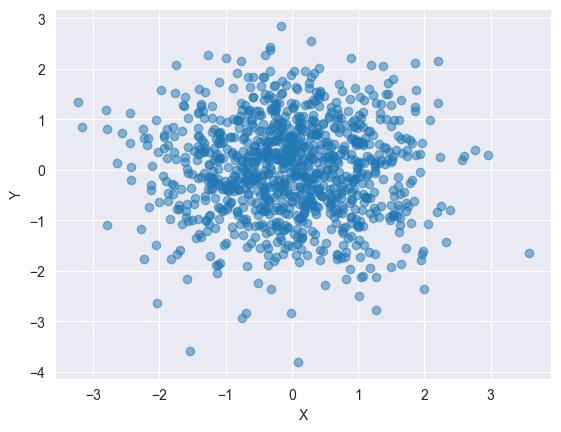

In [19]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

np.random.seed(123)

n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)


plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
asymptotic_independence_test(X, Y, stats="mi")

(64.38590922521632, 0.912082858809845)

In [21]:
asymptotic_independence_test(X, Y, stats="chi2")

(72.62304420652461, 0.7354713512772878)

In [22]:
independence_test_permutation(X, Y, 1000)

(0.03219295461260816, 0.5104895104895105)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

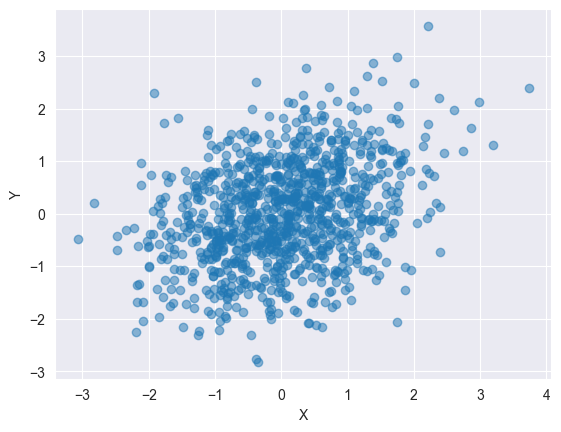

In [27]:
# dependent r.v. - ideally we will reject the null hypothesis

np.random.seed(123)
n = 1000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.3], [0.3, 1]]), n)
X, Y = data_2d[:, 0], data_2d[:, 1]

plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [28]:
asymptotic_independence_test(X, Y, stats="mi")

(149.24014703972347, 5.975826318560529e-06)

In [29]:
asymptotic_independence_test(X, Y, stats="chi2")

(257.68137301579293, 2.753992192154322e-20)

In [30]:
independence_test_permutation(X, Y, 1000)

(0.07462007351986173, 0.000999000999000999)